El algoritmo DBSCAN, que significa Agrupación Espacial Basada en la Densidad de Aplicaciones con Ruido, es un potente algoritmo de agrupación que agrupa puntos que están muy juntos en el espacio de datos. A diferencia de otros algoritmos de agrupación, DBSCAN no requiere especificar de antemano el número de clústers, lo que lo hace especialmente útil para el análisis exploratorio de datos.

El algoritmo funciona definiendo los clústers como regiones densas separadas por regiones de menor densidad. Este enfoque permite al DBSCAN descubrir clústers de forma arbitraria e identificar los valores atípicos como ruido.   

El DBSCAN gira en torno a tres conceptos clave:

1. *Puntos básicos*: Son puntos que tienen al menos un número mínimo de otros puntos (MinPts) a una distancia determinada (ε o épsilon).
2. *Puntos fronterizos*: Son puntos que están dentro de la distancia ε de un punto central, pero que no tienen un número de vecinos MinPts.
3. *Puntos de ruido*: Son puntos que no son ni puntos centrales ni puntos fronterizos. No están lo suficientemente cerca de ningún cúmulo como para ser incluidos. 

<img src="/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/Aprendizaje No Supervisado/img/dbscan1.avif">




El diagrama anterior ilustra estos conceptos. Los puntos centrales (azules) forman el corazón de los clústers, los puntos fronterizos (naranjas) están en el borde de los clústers, y los puntos de ruido (rojos) están aislados.

DBSCAN utiliza dos parámetros principales:

- ***ε (épsilon)***: La distancia máxima entre dos puntos para que se consideren vecinos.
- ***MinPts***: El número mínimo de puntos necesarios para formar una región densa.   

Ajustando estos parámetros, se puede controlar el modo en que el algoritmo define los clústers, lo que le permite adaptarse a distintos tipos de conjuntos de datos y requisitos de clustering.

## ¿Cómo funciona el algoritmo DBSCAN?   

DBSCAN funciona examinando el vecindario de cada punto del conjunto de datos. El algoritmo sigue un proceso paso a paso para identificar los clústers basándose en la densidad de los puntos de datos.   
 
Veamos cómo funciona DBSCAN:

1. Selección de parámetros.
    - Elige **ε (épsilon)**: La distancia máxima entre dos puntos para que se consideren vecinos.
    - Elige **MinPts**: El número mínimo de puntos necesarios para formar una región densa.
2. Selecciona un punto de partida
    - El algoritmo comienza con un punto arbitrario no visitado del conjunto de datos.
3. Examina el vecindario.
    - Recupera todos los puntos dentro de la distancia **ε** del punto inicial.
    - Si el número de puntos vecinos es inferior a **MinPts**, el punto se etiqueta como ruido (por ahora).
    - Si hay al menos puntos MinPts dentro de una distancia **ε**, el punto se marca como punto núcleo, y se forma un nuevo clúster.
4. Expandir el clúster.
    - Todos los vecinos del punto central se añaden al clúster.
    - Para cada uno de estos vecinos:
        - Si es un punto central, sus vecinos se añaden al clúster recursivamente.
        - Si no es un punto central, se marca como punto fronterizo y la expansión se detiene.
5. Repetir el proceso.
    - El algoritmo se desplaza al siguiente punto no visitado del conjunto de datos.
    - Los pasos 3-4 se repiten hasta que se hayan visitado todos los puntos.
6. Finalizar las Agrupaciones.
    - Una vez procesados todos los puntos, el algoritmo identifica todos los clústers.
    - Los puntos etiquetados inicialmente como ruido pueden ser ahora puntos fronterizos si están a ε de distancia de un punto central.
7. Manipulación del ruido.
    - Los puntos que no pertenecen a ningún clúster permanecen clasificados como ruido.

Este proceso permite al DBSCAN formar clústers de formas arbitrarias e identificar los valores atípicos con eficacia. La capacidad del algoritmo para encontrar clústers sin especificar de antemano el número de estos es uno de sus puntos fuertes.

Destacar el hecho de que la elección de **ε** y **MinPts**, como se ve a continuación, puede afectar significativamente a los resultados de la agrupación.

## Elegir los parámetros DBSCAN
La eficacia de DBSCAN depende en gran medida de la elección de sus dos parámetros principales: ***ε (épsilon)*** y ***MinPts***.    
A continuación, se comenta cómo enfocar la selección de estos parámetros:

### Seleccionar **ε** (épsilon)   

El parámetro ε determina la distancia máxima entre dos puntos para que se consideren vecinos. Para elegir una ε adecuada seguiremos los pasos siguientes:

1. Utilizar el conocimiento del dominio: Si se tiene una idea de qué distancia es significativa para el problema concreto, se recomienda usar como punto de partida.

2. Gráfico de distancia K (gráfico de codo): (Enfoque más sistemático)

    - Calcular la distancia al k-ésimo vecino más próximo de cada punto (donde k = MinPts).
    - Trazar estas distancias k en orden ascendente.
    - Buscar un "codo" en el gráfico: un punto en el que la curva empiece a nivelarse.
    - El valor ε en este codo suele ser una buena elección.   


### Seleccionar MinPts   

***MinPts*** determina el número mínimo de puntos necesarios para formar una región densa. Estas son algunas pautas:

1. Regla general: Un buen punto de partida es establecer MínPts = 2 * núm_características, donde núm_características es el número de dimensiones del conjunto de datos.

2. Consideración del ruido: Si los datos tienen ruido o se quiere detectar clústers más pequeños, tal vez sea interesante disminuir el valor de **MinPts**.

3. Tamaño del conjunto de datos: Para conjuntos de datos más grandes, puede que sea necesario aumentar el valor de **MinPts** para evitar crear demasiados clústers de pequeño tamaño.

Cabe recordar que la elección de los parámetros puede afectar significativamente a los resultados. A menudo es recomendable experimentar con distintos valores y evaluar los clústers resultantes para encontrar el que mejor se ajuste al conjunto de datos y problema específicos.

## Implementación de DBSCAN en Python
A continuación, se lleva a cabo la implementación de DBSCAN usando la biblioteca scikit-learn.    

Se utiliza [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) para generar los datos y, a continuación, llevar a cabo el proceso de análisis.

### Cargamos librerías necesarias

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### Generamos datos de muestra sintéticos (usando ```make_moons```)   

El siguiente código crea un conjunto de datos sintéticos utilizando la  función **make_moons** de scikit-learn.    

He aquí una breve descripción del conjunto de datos:

La  función ```make_moons()``` genera una clasificación binaria que se asemeja a dos medias lunas intercaladas. En nuestro caso:

- Creamos 200 muestras (n_samples=200)
- Añadimos una pequeña cantidad de ruido gaussiano (noise=0.05) para que el conjunto de datos sea más realista
- Fijamos random_state=42 para la reproducibilidad

Este conjunto de datos es especialmente útil para demostrar el DBSCAN porque:

1. Tiene una forma no convexa que muchos agrupación algoritmos (como K-means) tendrían problemas
2. Los dos grupos están claramente separados pero tienen una forma compleja
3. El ruido añadido proporciona un escenario más realista en el que algunos puntos podrían clasificarse como valores atípicos

In [ ]:
# Solo cargamos el valor de X, ya que no necesitamos el valor de y porque es un algoritmo de clustering

X, _ = make_moons(n_samples=200, noise=0.05, random_state=42) 

### Visualización del conjunto de datos generado.

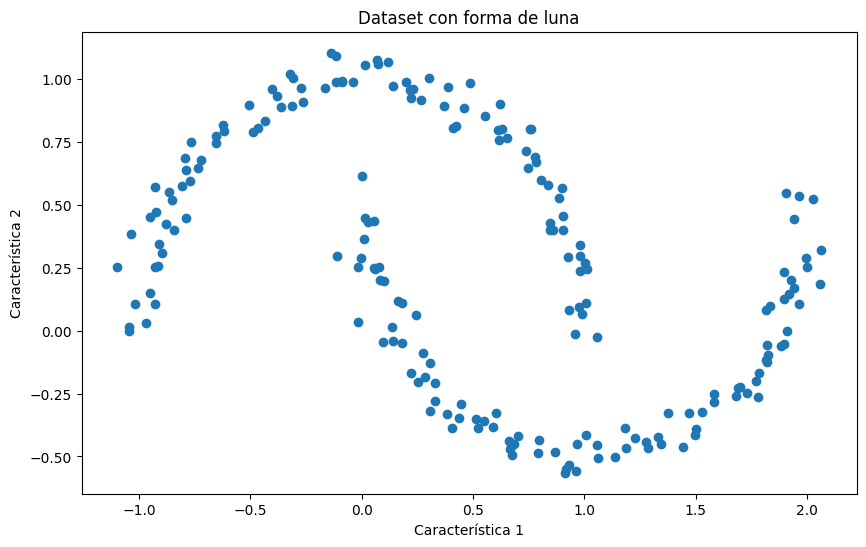

In [ ]:
# Visualización del dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset con forma de luna')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

### Determinación del parámetro ε (épsilon)   

Utilizamos el método del gráfico de distancia *k* (gráfico de codo) para ayudar a elegir un valor épsilon adecuado:

1. Definir una función ```plot_k_distance_graph``` que calcula la distancia al *k-ésimo* vecino más próximo de cada punto.
2. Las distancias se ordenan y se representan gráficamente.
3. Buscar un "codo" en el gráfico resultante para elegir épsilon.

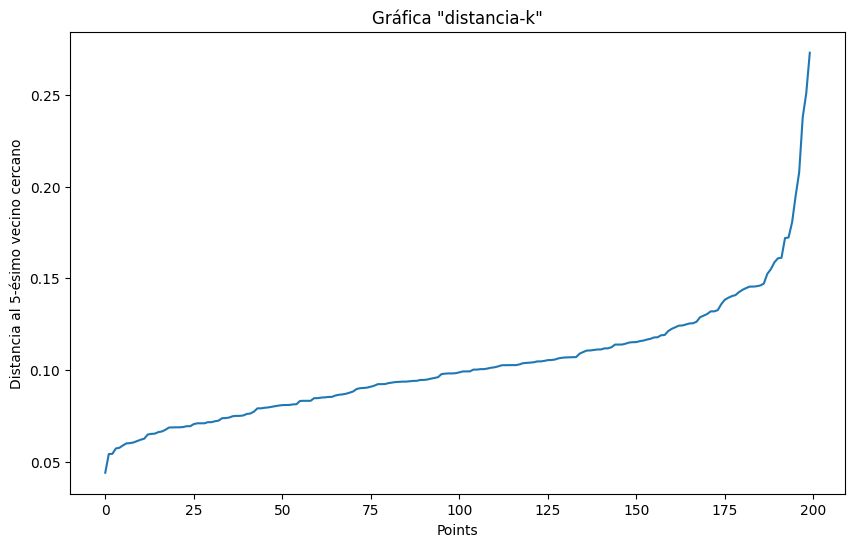

In [ ]:
# Función para graficar la gráfica de distancia-k
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k) # Definimos el número de vecinos cercanos, usamos el algoritmo "nearest neighbors"
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X) # Obtenemos las distancias a los k vecinos más cercanos
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'Distancia al {k}-ésimo vecino cercano')
    plt.title('Gráfica "distancia-k"')
    plt.show()

# Ploteado de la gráfica de distancia-k
plot_k_distance_graph(X, k=5)

Basándonos en el gráfico de "distancia-k", elegimos un épsilon con valor = 0,15.

### Realizar la agrupación DBSCAN   

Si se usa la implementación DBSCAN de scikit-learn, la secuencia a seguir es la siguiente:

1. Fijar epsilon=0.15 basándonos en el gráfico de distancia k.
2. Establecer min_samples=5 (2 * num_características, ya que los datos son 2D).
3. Ajustar el modelo a los datos y realizar la predicción de las agrupaciones.

In [ ]:

# Ejecución del algoritmo DBSCAN
epsilon = 0.15  # Selección basada en la gráfica "distancia-k"
min_samples = 5  # 2 * n_features (2 * 2 = 4) como mínimo. Seleccionamos 5 para tener al menos un outlier
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples) # Creación del modelo
clusters = dbscan.fit_predict(X) # Entrenamiento y predicción

### Visualizar los resultados.   

Se crea un gráfico de dispersión de los puntos de datos, coloreándolos según los clústers asignados.    
Los puntos clasificados como ruido suelen tener un color diferente (a menudo negro).

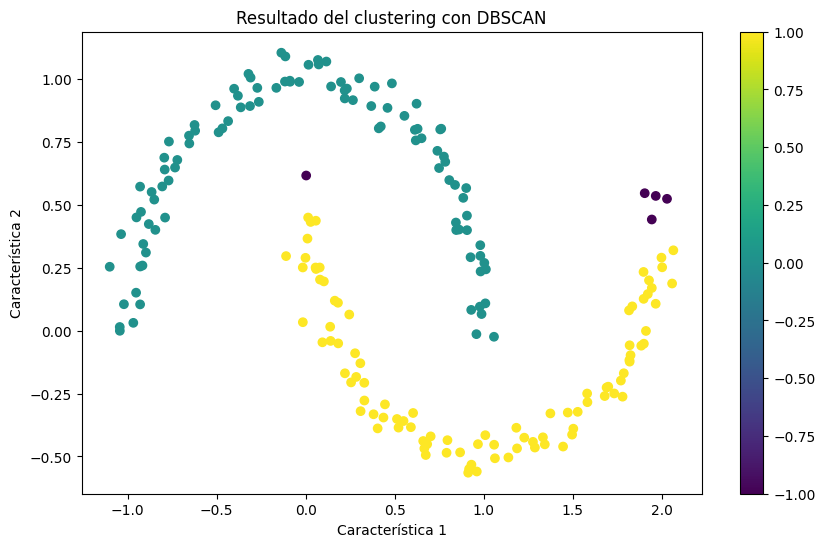

In [ ]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('Resultado del clustering con DBSCAN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

### Interpretar los resultados   

Por último, se imprime el número de clústers encontrados y el número de puntos clasificados como ruido. Esto ofrece un resumen rápido de los resultados de la agrupación.

In [50]:
# Número de clusters y puntos de ruido
print("Número total de clústers detectados: ", len(set(clusters))) # Número de clusters total. 2 clusters + 1 de ruido(outliers)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0) # Restamos 1 si hay ruido. set(clusters) nos da los clusters únicos
n_noise = list(clusters).count(-1) # Contamos cuántos puntos hay en el cluster de ruido. Son los puntos que tienen cluster -1
print(f'Número de clústers reales: {n_clusters}')
print(f'Número de puntos de ruido: {n_noise}')

Número total de clústers detectados:  3
Número de clústers reales: 2
Número de puntos de ruido: 5


## Conclusión.   

Cabe recordar que la clave del éxito de la agrupación DBSCAN suele estar en la selección adecuada de los parámetros. Por tanto, es aconsejable experimentar con distintos valores de ***épsilon*** y ***min_samples*** para encontrar el que mejor se ajuste al conjunto de datos analizado.



### DBSCAN vs. K-Means

Aunque tanto DBSCAN como K-Means son algoritmos de agrupación populares, tienen características distintas que los hacen adecuados para distintos tipos de datos y casos de uso.    

A continuación, mostramos una tabla comparando estos dos algoritmos para comprender cuándo utilizar cada uno:   


| FUNCIÓN | DBSCAN | K-MEANS|
|---------|--------|--------|
| Forma de racimo | Puede identificar agrupaciones de formas arbitrarias | Supone que las agrupaciones son convexas y aproximadamente esféricas |
| Número de grupos | No requiere especificar previamente el número de agrupaciones | Requiere especificar previamente el número de clústers (K) |
| Gestión outliers | Identificados como ruido | Fuerza a cada punto a formar un clúste, lo que puede distorsionar las formas de los clústers |
| Sensibilidad a los parámetros | Sensible a los parámetros épsilon y MinPts | Sensible a las posiciones iniciales de los centroides y a la elección de K |
| Densidad de grupos | Puede encontrar agrupaciones de densidades variables | Tiende a encontrar agrupaciones de extensión espacial y densidad similares |
| Escalabilidad | Menos eficiente para grandes conjuntos de datos, especialmente con datos de alta dimensión | Generalmente es más eficaz y se adapta mejor a grandes conjuntos de datos |
| Tratamiento de los cúmulos no globulares | Funciona bien en cúmulos no globulares | Dificultades con las formas no globulares |
| Coherencia de los resultados | Produce resultados coherentes en todas las ocasiones | Los resultados pueden variar debido a la inicialización aleatoria de los centroides|   





## Comparativa visual

A continuación, se aplican ambos algoritmos sobre el conjunto de datos generados con ```make_moons```:

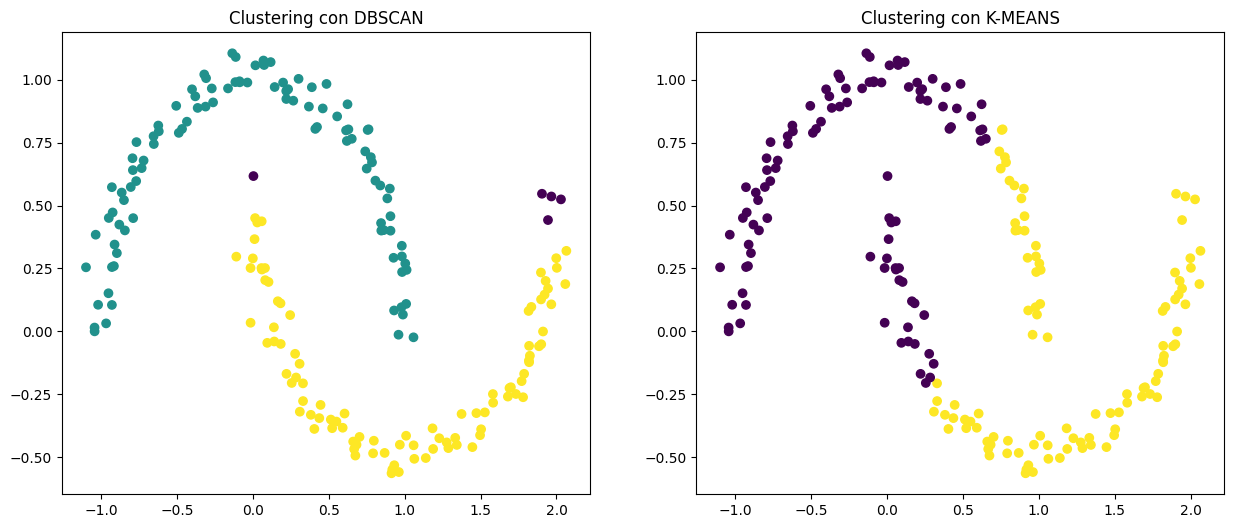

In [39]:
from sklearn.cluster import KMeans

# DBSCAN clustering
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
ax1.set_title('Clustering con DBSCAN')

ax2.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax2.set_title('Clustering con K-MEANS')

plt.show()


Observamos lo siguiente:

- DBSCAN identifica correctamente las dos formas de media luna como clústers separados.
- K-Means tiene problemas con la forma no convexa, y a menudo divide una luna en dos grupos o combina partes de ambas lunas en un grupo.
- DBSCAN puede identificar algunos puntos como ruido (normalmente coloreados de forma diferente), mientras que K-Means asigna cada punto a un clúster.

## ¿Cúando aplicar el algoritmo DBSCAN?   


Las propiedades únicas del DBSCAN lo hacen especialmente adecuado para determinados tipos de datos y dominios de problemas:   

1. **Formas de racimo complejas** 
Como se ha comprobado en la comparación anterior, DBSCAN destaca realmente cuando se trata de formas de conglomerados no globulares. Si los datos forman patrones arbitrarios como las medias lunas que se han explorado antes, es probable que DBSCAN supere a los algoritmos tradicionales como K-Means. 

Por ejemplo, en el análisis geográfico, las formaciones naturales como los sistemas fluviales o la expansión urbana suelen tener formas irregulares que DBSCAN puede identificar eficazmente.

2. **Número desconocido de grupos**
Una de las principales ventajas de DBSCAN es su capacidad para determinar automáticamente el número de clústers. Esto es especialmente útil en el análisis exploratorio de datos, en el que puede que no se disponga de conocimientos previos sobre la estructura subyacente de los datos a analizar. 

Por ejemplo, para un problema de segmentación del mercado: puede que no se conozca de antemano cuántos grupos de clientes distintos existen. DBSCAN puede ayudar a descubrir estos segmentos sin que sea necesario adivinar el número de clústers.   

3. **Conjuntos de datos con ruido** 
El enfoque del DBSCAN para tratar los puntos de ruido lo hace robusto frente a los valores atípicos. Esto es crucial en muchos conjuntos de datos del mundo real, donde los errores de medición o las anomalías son frecuentes.

Por ejemplo, en los sistemas de detección de anomalías para la seguridad de la red, DBSCAN puede separar eficazmente los patrones normales de tráfico de red de las posibles amenazas a la seguridad.   

4. **Densidades de agrupación variables**
A diferencia de las K-Means, que suponen clústers de densidad similar, DBSCAN puede identificar clústers de densidades variables. Esto es especialmente útil en situaciones en las que algunos grupos de los datos están más juntos que otros.

Un ejemplo podría ser el análisis de las distribuciones de galaxias en astronomía, donde diferentes regiones del espacio tienen densidades variables de objetos celestes.   


Por otro lado, no debemos olvidar **posibles limitaciones para este algoritmo**, entre las cúales destacamos:   


- Sensibilidad de los parámetros: Como hemos dicho antes, elegir valores adecuados para ε y MinPts es crucial. Una mala elección puede conducir a resultados de agrupación subóptimos.
- Datos de alta dimensión: El rendimiento de DBSCAN puede degradarse con datos de alta dimensionalidad debido a la "maldición de la dimensionalidad".('A medida que aumentan las dimensiones, el concepto de proximidad o densidad se vuelve menos significativo y la distancia entre puntos tiende a igualarse, lo que dificulta distinguir los grupos según la densidad.')
- Densidades variables: Aunque DBSCAN puede manejar clústers de diferentes densidades, las densidades extremadamente variables en el mismo conjunto de datos pueden seguir planteando problemas.
- Escalabilidad: Para conjuntos de datos muy grandes, DBSCAN puede resultar caro computacionalmente en comparación con algoritmos como K-Means.

### Campos de aplicación de DBSCAN   

***Análisis de datos espaciales***   

En los sistemas de información geográfica (SIG), DBSCAN puede identificar zonas de gran actividad o interés. Por ejemplo, un estudio titulado ['Descubrir la movilidad humana urbana a partir de datos GPS de taxis a gran escala'](https://ideas.repec.org/a/eee/phsmap/v438y2015icp140-153.html) demuestra cómo el DBSCAN puede detectar puntos calientes urbanos a partir de datos GPS de taxis. 

Esta aplicación muestra la capacidad de DBSCAN para identificar regiones de actividad densa en datos espaciales, lo que es crucial para la planificación urbana y la gestión del transporte.

***Tratamiento de imágenes***    

DBSCAN puede agrupar píxeles en objetos distintos para tareas como el reconocimiento de objetos en imágenes. Un estudio titulado ['Segmentación de tumores cerebrales a partir de imágenes de resonancia magnética: análisis de agrupaciones K-means y DBSCAN'](https://www.semanticscholar.org/paper/Segmentation-of-Brain-Tumour-from-MRI-image-%E2%80%93-of-Bandyopadhyay/a082abca6c53cc8d4f5fc80c7ad0fa83464cca48) demuestra la eficacia de DBSCAN en el análisis de imágenes médicas .

Los investigadores utilizaron DBSCAN para segmentar con precisión tumores cerebrales en resonancias magnéticas, mostrando su potencial en el diagnóstico asistido por ordenador y la imagen médica.

***Detección de anomalías***    

En la detección de fraudes o la supervisión del estado del sistema, DBSCAN puede aislar patrones inusuales. Un estudio titulado ['Detección incremental de valores atípicos basada en clústeres y densidad eficiente en flujos de datos'](https://www.sciencedirect.com/science/article/abs/pii/S0020025522005953) demuestra la aplicación de un algoritmo DBSCAN modificado para la detección de anomalías en tiempo real. 

Los investigadores aplicaron una versión incremental de DBSCAN para detectar valores atípicos en datos de flujo, lo que tiene aplicaciones potenciales en la detección del fraude y la supervisión del estado del sistema. 

Este estudio muestra cómo puede adaptarse DBSCAN para identificar patrones inusuales en flujos de datos continuos, una capacidad crucial para los sistemas de detección de fraudes en tiempo real.

***Sistemas de recomendación***   

DBSCAN puede agrupar a usuarios con preferencias similares, lo que ayuda a generar recomendaciones más precisas. Por ejemplo, un estudio titulado ['Sistema de recomendación de servicios basado en múltiples nubes mediante el algoritmo DBSCAN'](https://link.springer.com/article/10.1007/s11277-020-07609-3) demuestra la aplicación de DBSCAN para mejorar el filtrado colaborativo de los sistemas de recomendación. Los investigadores utilizaron DBSCAN como parte de un enfoque de agrupación para agrupar a los usuarios en función de sus preferencias y valoraciones de películas, lo que mejoró la precisión de las recomendaciones de películas.

Este enfoque muestra cómo DBSCAN puede mejorar las recomendaciones personalizadas en dominios como los servicios de streaming de entretenimiento.

# Recapitulación   


DBSCAN es una poderosa herramienta del conjunto de herramientas del científico de datos, especialmente valiosa cuando se trata de conjuntos de datos complejos y ruidosos en los que se desconoce el número de clústers. Sin embargo, como cualquier algoritmo, no es una solución única. 

La clave del éxito de la agrupación reside en comprender los datos, los puntos fuertes y las limitaciones de los distintos algoritmos, y elegir la herramienta adecuada para el trabajo. En muchos casos, probar varios enfoques de agrupación, incluidos DBSCAN y K-Means, y comparar sus resultados puede proporcionar información valiosa sobre la estructura de tus datos.